# Initialization for prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# Other available themes:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")

In [2]:

# Load datasets
cyclists_df = pd.read_pickle('cyclists_transformed.pkl')
races_df = pd.read_pickle('races_transformed.pkl')

# Display info
print("Cyclists DataFrame:")
# print(cyclists_df.info())
cyclists_df.head()
print("\nRaces DataFrame:")
# print(races_df.info())
races_df.head()

Cyclists DataFrame:

Races DataFrame:


_url            name  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position           cyclist  cyclist_age  \
0               1241         0        sean-kelly           22   
1               1241         1  gerrie-knetemann           27   
2               1241         2    rene-bittinger           24   
3               1241         3    joseph-bruyere           30   
4               1241         4  sven-ake-nilsson           27   

                           cyclist_team  delta        day  year  
0  vini-ricordi-pinarello-sidermec-1986      0 1978-07-05  1978  
1                           norway-1987      0 1978-07-05  1978  
2                               unknown      0 1978-07-05  1978  
3              navigare-blue-storm-1993      0 1978-07-05  1978  
4                            spain-1991      0 1978-07-05  1978

In [3]:
races_merged_df = pd.merge(races_df, cyclists_df, left_on='cyclist', right_on='_url')
races_merged_df.head()

_url_x          name_x  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position            cyclist  cyclist_age  \
0               1241         1   gerrie-knetemann           27   
1               1241         2     rene-bittinger           24   
2               1241         3     joseph-bruyere           30   
3               1241         4   sven-ake-nilsson           27   
4               1241         5  jacques-esclassan           30   

               cyclist_team  ...              name_y birth_year  weight  \
0               norway-1987  ...   gerrie  knetemann       1951      80   
1                   unknown  ...     rené  bittinger       1954      69   
2  navigare-blue-storm-1993  ...     joseph  bruyère       1948      75   
3                spain-1991  ...   sven-åke  nilsson       1951      63   
4   kelme-costa-blanca-2000  ...  jacques  esclassan       1948      60   

  height  nationality   bmi  races_participated  average_delta  \
0    185  netherlands  23.4                 252            298   
1    174       france  22.8                 146            239   
2    182      belgium  22.6                  33             78   
3    172       sweden  21.3                 145            129   
4    166       france  21.8                  47            368   

  average_climb_total  average_length  
0                1736          160777  
1                1571          171172  
2                1604          157898  
3                1814          168843  
4                1793          157851  

[5 rows x 24 columns]

## Sampling

In [4]:
SAMPLE_FRACTION = 0.10
print(f"Sampling {SAMPLE_FRACTION*100}% of the dataset. That is {int(SAMPLE_FRACTION * len(races_merged_df))} rows.")
sampled_df = races_merged_df.sample(frac=SAMPLE_FRACTION, random_state=42)
#TODO: togliere?


# TODO: provare undersampling: https://github.com/data-mining-UniPI/teaching24/blob/main/notebooks/imbalanced_classification.ipynb

Sampling 10.0% of the dataset. That is 33580 rows.


## Utilities

In [5]:
from sklearn.metrics import classification_report
def report_scores(labels, predictions):
    print(classification_report(labels, predictions, target_names=['Not Top-20', 'Top-20']))
    

def plot_confusion_matrix(test_labels, predictions, title='Confusion Matrix'):
    cm = confusion_matrix(test_labels, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Top-20', 'Top-20'], yticklabels=['Not Top-20', 'Top-20'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    
    
    
class ModelResults:
    def __init__(self):
        self.results = []

    def add_result(self, model_name, train_set_predictions, validation_set_predictions, parameters, sample_size):
        result = {
            'model_name': model_name,
            'train_set_predictions': train_set_predictions,
            'validation_set_predictions': validation_set_predictions,
            'parameters': parameters,
            'sample_size': sample_size
        }
        self.results.append(result)

    def get_results(self):
        return self.results

    def get_result_by_model(self, model_name):
        return [result for result in self.results if result['model_name'] == model_name]

    def __str__(self):
        return str(self.results)
    

In [6]:
model_results = ModelResults()
print(model_results.get_results())

[]


## Computing the labels

In [7]:
races_merged_df['is_top_20'] = (races_merged_df['position'] <= 20).astype(int)
races_merged_df.head()

_url_x          name_x  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position            cyclist  cyclist_age  \
0               1241         1   gerrie-knetemann           27   
1               1241         2     rene-bittinger           24   
2               1241         3     joseph-bruyere           30   
3               1241         4   sven-ake-nilsson           27   
4               1241         5  jacques-esclassan           30   

               cyclist_team  ...  birth_year weight  height  nationality  \
0               norway-1987  ...        1951     80     185  netherlands   
1                   unknown  ...        1954     69     174       france   
2  navigare-blue-storm-1993  ...        1948     75     182      belgium   
3                spain-1991  ...        1951     63     172       sweden   
4   kelme-costa-blanca-2000  ...        1948     60     166       france   

    bmi  races_participated  average_delta  average_climb_total  \
0  23.4                 252            298                 1736   
1  22.8                 146            239                 1571   
2  22.6                  33             78                 1604   
3  21.3                 145            129                 1814   
4  21.8                  47            368                 1793   

  average_length  is_top_20  
0         160777          1  
1         171172          1  
2         157898          1  
3         168843          1  
4         157851          1  

[5 rows x 25 columns]

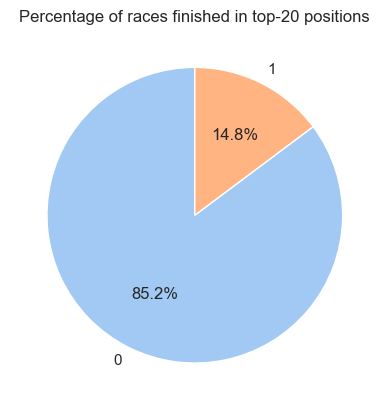

In [8]:
is_top_20_counts = races_merged_df['is_top_20'].value_counts()
is_top_20_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of races finished in top-20 positions')
plt.ylabel('')
plt.show()

## Discretizing the data

The categorical column "nationality" is discretized.

In [9]:
# function to discretize the variables
# input: the dataset and the list of variables' names to discretize
# credits: https://github.com/data-mining-UniPI/teaching24/blob/main/notebooks/machine_learning.ipynb
def discretize_data(dataset, variables):
    dataset_copy = dataset.copy()
    for variable in variables:
        # get the unique variable's values
        var = sorted(dataset_copy[variable].unique())
        
        # generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        # add a new column with the number representation of the variable
        dataset_copy[variable + '_num'] = dataset_copy[variable].map(mapping).astype(int)
    return dataset_copy

In [10]:
categorical_variables = ['nationality']
categorical_variables_discretized = [var + '_num' for var in categorical_variables]

In [11]:
races_merged_discretized_df = discretize_data(races_merged_df, categorical_variables)
races_merged_discretized_df.drop(columns=categorical_variables, inplace=True)
races_merged_discretized_df.head()

_url_x          name_x  points  length  climb_total  \
0  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
1  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
2  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
3  tour-de-france/1978/stage-6  tour de france     100  162000         1101   
4  tour-de-france/1978/stage-6  tour de france     100  162000         1101   

   startlist_quality  position            cyclist  cyclist_age  \
0               1241         1   gerrie-knetemann           27   
1               1241         2     rene-bittinger           24   
2               1241         3     joseph-bruyere           30   
3               1241         4   sven-ake-nilsson           27   
4               1241         5  jacques-esclassan           30   

               cyclist_team  ...  birth_year weight  height   bmi  \
0               norway-1987  ...        1951     80     185  23.4   
1                   unknown  ...        1954     69     174  22.8   
2  navigare-blue-storm-1993  ...        1948     75     182  22.6   
3                spain-1991  ...        1951     63     172  21.3   
4   kelme-costa-blanca-2000  ...        1948     60     166  21.8   

  races_participated  average_delta  average_climb_total  average_length  \
0                252            298                 1736          160777   
1                146            239                 1571          171172   
2                 33             78                 1604          157898   
3                145            129                 1814          168843   
4                 47            368                 1793          157851   

   is_top_20  nationality_num  
0          1               44  
1          1               24  
2          1                7  
3          1               59  
4          1               24  

[5 rows x 25 columns]

Now we have:
- races_merged_discretized_df: the dataset, discretized

TODO: quando fai knn fai attenzione a non usare le colonne che hai dicretizzato credo

## Splitting for Training, Validation, and Test Sets

We will split our datasets into training, validation, and test sets.

The test set will consist of races from the year 2022 and onward, as requested in the project description. The remaining data will be split into training and validation sets. 

- The **training** set will be used to train the model
- The **validation** set will be used to tune and validate the model during the training process.
- The **test set** will be used at the end to evaluate the model's performance on unseen data.

In [12]:
from sklearn.model_selection import train_test_split

# Splits the data into training, validation, and test sets
def split_data(df, label_column):
    assert 'year' in df.columns, "The dataset must contain a 'year' column."
    train_df = df[df['year'] < 2022]
    test_df = df[df['year'] >= 2022]

    # Further split the training set into training and validation sets
    train_set, validation_set = train_test_split(train_df, test_size=0.2, random_state=42)

    # Extract labels
    train_labels = train_set[label_column]
    validation_labels = validation_set[label_column]
    test_labels = test_df[label_column]

    # Drop labels from the datasets
    train_set = train_set.drop(columns=[label_column])
    validation_set = validation_set.drop(columns=[label_column])
    test_df = test_df.drop(columns=[label_column])

    return train_set, validation_set, test_df, train_labels, validation_labels, test_labels

In [13]:
# Split the data
train_set, validation_set, test_set, train_labels, validation_labels, test_labels = split_data(races_merged_discretized_df, 'is_top_20')

In [14]:
total_discretized = len(races_merged_discretized_df)
print(f"Discretized Data - Training set: {len(train_set)} ({len(train_set) / total_discretized:.2%}), Validation set: {len(validation_set)} ({len(validation_set) / total_discretized:.2%}), Test set: {len(test_set)} ({len(test_set) / total_discretized:.2%})")

Discretized Data - Training set: 248195 (73.91%), Validation set: 62049 (18.48%), Test set: 25559 (7.61%)


## Selecting the columns

Selecting only the columns relevant and useful for prediction and dropping the rest.
Since we want to predict the outcome of the race, we will also drop the columns that are not available before the match starts.

In [15]:
columns_to_drop = ['_url_x', 'name_x', '_url_y', 'name_y', 'cyclist', 'cyclist_team', 'day', 'birth_year', 'delta', 'average_delta', 'position', 'year', 'height']

train_set.drop(columns=columns_to_drop, inplace=True)
validation_set.drop(columns=columns_to_drop, inplace=True)
test_set.drop(columns=columns_to_drop, inplace=True)

train_set.head()

# TODO: maybe add feature "races participated" until now?


points  length  climb_total  startlist_quality  cyclist_age  weight  \
103160      80  171400         2178                819           33      73   
102827      50  197500            0                691           26      78   
33110       80  221000            0                457           27      70   
39030       80  190000         1184                886           24      71   
57619       50    4000            0               1091           25      71   

         bmi  races_participated  average_climb_total  average_length  \
103160  22.3                  54                 2201          151989   
102827  24.9                  63                 1672          173601   
33110   20.7                  27                    0          146770   
39030   19.9                  74                 2359          162621   
57619   21.0                  87                 1594          161326   

        nationality_num  
103160               52  
102827                7  
33110                58  
39030                44  
57619                25

In [16]:
# check that the sets do not contain the 'year' column
assert 'year' not in train_set.columns
assert 'year' not in validation_set.columns
assert 'year' not in test_set.columns

# Classification with KNN

In [17]:
# dropping the categorical columns
print(f"Dropping these columns: {categorical_variables_discretized}")
train_set_no_categorical = train_set.drop(columns=categorical_variables_discretized)
validation_set_no_categorical = validation_set.drop(columns=categorical_variables_discretized)
test_set_no_categorical = test_set.drop(columns=categorical_variables_discretized)

Dropping these columns: ['nationality_num']


In [18]:
knn_params_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42,
    #verbose=3
)

knn_random_search.fit(train_set_no_categorical, train_labels)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 21),
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

## Evaluation

Evaluating the performance of this classifier wrt the training and validation sets.

In [19]:
best_knn = KNeighborsClassifier(**knn_random_search.best_params_)
best_knn.fit(train_set_no_categorical, train_labels)

training_predictions_knn = best_knn.predict(train_set_no_categorical)
validation_predictions_knn = best_knn.predict(validation_set_no_categorical)

In [20]:
print(f"KNN EVALUATION")

print(f"Best parameters found by grid search: {knn_random_search.best_params_}")
print(f"Their accuracy on the train set is: {knn_random_search.best_score_:.2f}")

print(f"SAMPLE_FRACTION={SAMPLE_FRACTION}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_knn)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_knn)

KNN EVALUATION
Best parameters found by grid search: {'weights': 'uniform', 'n_neighbors': 10, 'metric': 'manhattan'}
Their accuracy on the train set is: 0.85
SAMPLE_FRACTION=0.1


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92    211461
      Top-20       0.77      0.09      0.16     36734

    accuracy                           0.86    248195
   macro avg       0.82      0.54      0.54    248195
weighted avg       0.85      0.86      0.81    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      0.99      0.92     52836
      Top-20       0.60      0.06      0.11      9213

    accuracy                           0.85     62049
   macro avg       0.73      0.53      0.52     62049
weighted avg       0.82      0.85      0.80     62049



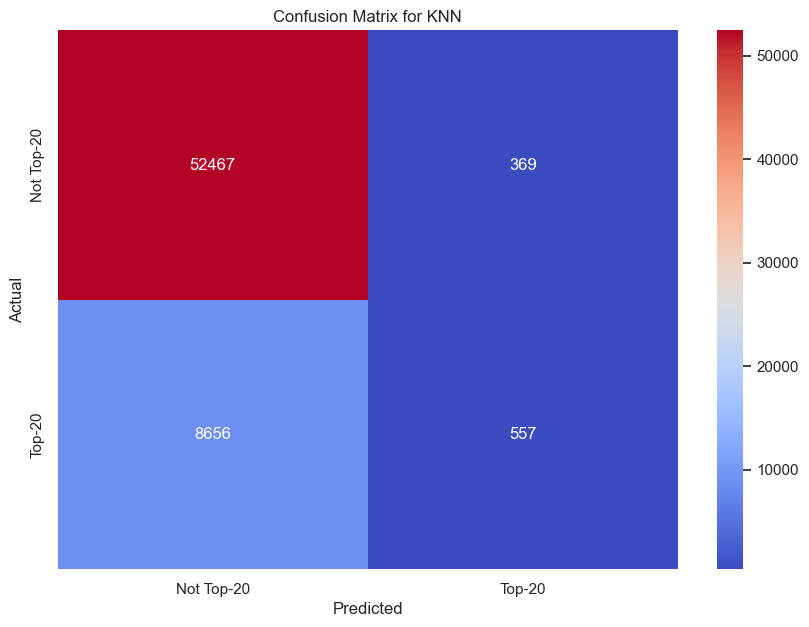

In [21]:
plot_confusion_matrix(validation_labels, validation_predictions_knn, title='Confusion Matrix for KNN')

In [22]:
#saving the results
model_results.add_result(
    model_name='KNN',
    train_set_predictions=training_predictions_knn,
    validation_set_predictions=validation_predictions_knn,
    parameters=knn_random_search.best_params_,
    sample_size=SAMPLE_FRACTION
)

# Classification with Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_labels)

GaussianNB()

In [24]:
train_predictions_gnb = gnb.predict(train_set)
validation_predictions_gnb = gnb.predict(validation_set)

In [25]:
print(f"GNB EVALUATION")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, train_predictions_gnb)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_gnb)

GNB EVALUATION
Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.86      0.96      0.91    211461
      Top-20       0.27      0.08      0.13     36734

    accuracy                           0.83    248195
   macro avg       0.56      0.52      0.52    248195
weighted avg       0.77      0.83      0.79    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      0.96      0.91     52836
      Top-20       0.28      0.09      0.13      9213

    accuracy                           0.83     62049
   macro avg       0.57      0.52      0.52     62049
weighted avg       0.77      0.83      0.79     62049



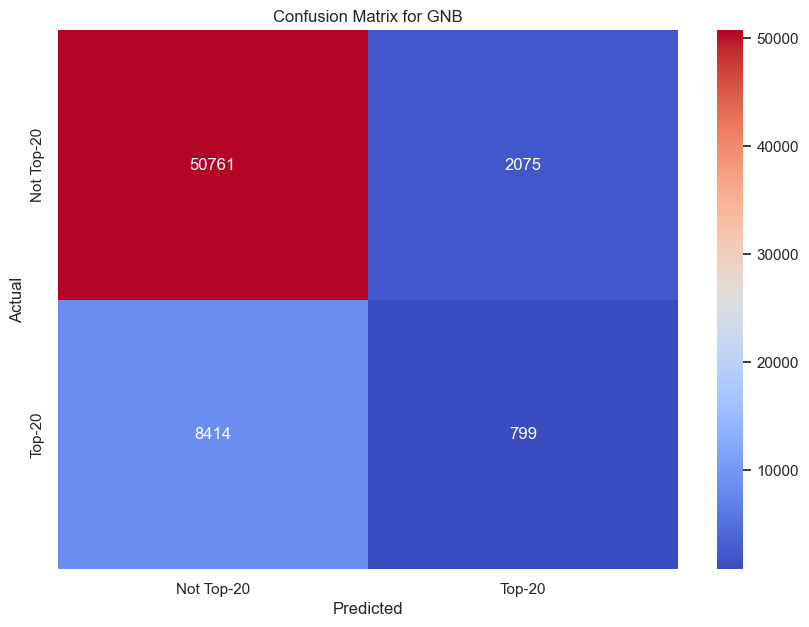

In [26]:
plot_confusion_matrix(validation_labels, validation_predictions_gnb, title='Confusion Matrix for GNB')

In [27]:
#saving the results
model_results.add_result(
    model_name='GNB',
    train_set_predictions=train_predictions_gnb,
    validation_set_predictions=validation_predictions_gnb,
    parameters=None,
    sample_size=SAMPLE_FRACTION
)

# Classification with Rule-Based (RIPPER)

TODO: forse funzionerebbe meglio con nationality one-hot encoded? chiedere

In [28]:
import wittgenstein as lw
from sklearn.model_selection import RandomizedSearchCV

# Initialize the RIPPER classifier
ripper_classifier = lw.RIPPER()

# Define the parameter grid for RandomizedSearchCV
# TODO: fare una ricerca con parametri seri
ripper_params_grid = {
    'prune_size': [0.3, 0.4, 0.5],
    'k': [1, 3, 5]
}

# Initialize RandomizedSearchCV with the RIPPER classifier and parameter grid
random_search_ripper = RandomizedSearchCV(ripper_classifier, ripper_params_grid, n_iter=5, cv=3, n_jobs=-1, verbose=3, random_state=42)

# Fit the model to the training data
try:
    random_search_ripper.fit(train_set, train_labels)
    print("Randomized search completed successfully.")
except Exception as e:
    print(f"An error occurred during randomized search: {e}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 3/3] END ...............k=1, prune_size=0.4;, score=0.856 total time= 5.9min
[CV 3/3] END ...............k=3, prune_size=0.5;, score=0.855 total time= 2.9min
[CV 2/3] END ...............k=5, prune_size=0.4;, score=0.857 total time= 9.8min
[CV 3/3] END ...............k=5, prune_size=0.4;, score=0.857 total time= 9.8min
[CV 2/3] END ...............k=1, prune_size=0.4;, score=0.857 total time=10.9min
[CV 2/3] END ...............k=3, prune_size=0.5;, score=0.857 total time=11.5min
[CV 1/3] END ...............k=3, prune_size=0.5;, score=0.858 total time=12.4min
[CV 1/3] END ...............k=5, prune_size=0.4;, score=0.858 total time=14.1min
[CV 3/3] END ...............k=1, prune_size=0.3;, score=0.856 total time= 5.4min
[CV 1/3] END ...............k=1, prune_size=0.4;, score=0.859 total time=17.0min
[CV 2/3] END ...............k=1, prune_size=0.3;, score=0.856 total time= 8.0min
[CV 3/3] END ...............k=5, prune_size=0.5;,

In [29]:
best_ripper = lw.RIPPER(**random_search_ripper.best_params_)
best_ripper.fit(train_set, train_labels)

training_predictions_ripper = best_ripper.predict(train_set)
validation_predictions_ripper = best_ripper.predict(validation_set)

In [30]:
print("RIPPER EVALUATION")

print(f"Best parameters found by grid search: {random_search_ripper.best_params_}")
print(f"Their accuracy on the train set is: {random_search_ripper.best_score_:.2f}")

print(f"SAMPLE_FRACTION={SAMPLE_FRACTION}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_ripper)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_ripper)

RIPPER EVALUATION
Best parameters found by grid search: {'prune_size': 0.5, 'k': 5}
Their accuracy on the train set is: 0.86
SAMPLE_FRACTION=0.1


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92    211461
      Top-20       0.84      0.08      0.14     36734

    accuracy                           0.86    248195
   macro avg       0.85      0.54      0.53    248195
weighted avg       0.86      0.86      0.81    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92     52836
      Top-20       0.80      0.07      0.13      9213

    accuracy                           0.86     62049
   macro avg       0.83      0.53      0.53     62049
weighted avg       0.85      0.86      0.81     62049



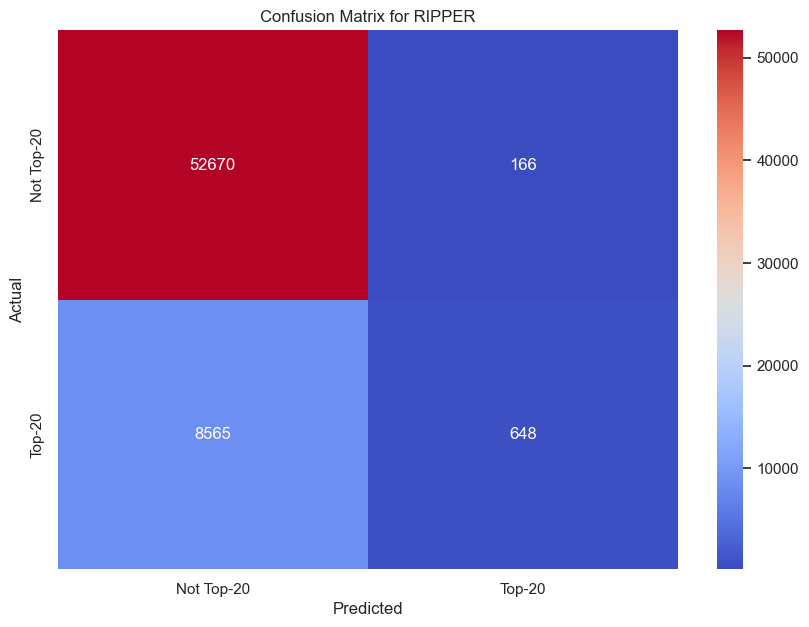

In [31]:
plot_confusion_matrix(validation_labels, validation_predictions_ripper, title='Confusion Matrix for RIPPER')

Visualizing the rules extracted by RIPPER.

In [32]:
best_ripper.out_model()

[[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^ nationality_num=25.0-33.0 ^ cyclist_age=<24.0 ^ average_climb_total=<894.0] V
[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^ average_climb_total=1507.0-1682.0 ^ weight=63.0-65.0] V
[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^ nationality_num=25.0-33.0 ^ average_climb_total=<894.0 ^ bmi=>22.9] V
[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^ average_climb_total=1337.0-1507.0 ^ nationality_num=33.0-45.0] V
[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^ nationality_num=>58.0 ^ bmi=21.8-22.3] V
[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^ average_climb_total=1507.0-1682.0 ^ nationality_num=<7.0] V
[climb_total=<82.0 ^ startlist_quality=<684.0 ^ average_length=>179931.0 ^ points=<50.0 ^

Visualizing some of the explanations for the predictions made by RIPPER.

In [33]:
# Get some predictions with reasons
outcome, reasons = best_ripper.predict(train_set[:10000], give_reasons=True)

# DataFrame to display the results
ripper_reasons_df = pd.DataFrame({
    'Prediction': outcome,
    'Reason': reasons
})


# exclude the rows where the prediction is 'False'
ripper_reasons_df = ripper_reasons_df[ripper_reasons_df['Prediction']]
ripper_reasons_df

Prediction                                             Reason
64          True  [[climb_total=<82.0^average_length=>179931.0^p...
94          True  [[climb_total=<82.0^average_length=>179931.0^p...
108         True  [[climb_total=<82.0^startlist_quality=<684.0^p...
109         True  [[climb_total=<82.0^average_length=>179931.0^p...
156         True  [[climb_total=<82.0^startlist_quality=<684.0^a...
...          ...                                                ...
9624        True  [[climb_total=<82.0^startlist_quality=<684.0^a...
9646        True  [[climb_total=<82.0^startlist_quality=<684.0^a...
9704        True  [[climb_total=<82.0^startlist_quality=<684.0^a...
9759        True  [[climb_total=<82.0^startlist_quality=<684.0^a...
9923        True  [[climb_total=<82.0^startlist_quality=<684.0^a...

[140 rows x 2 columns]

In [34]:
#saving the results
model_results.add_result(
    model_name='RIPPER',
    train_set_predictions=training_predictions_ripper,
    validation_set_predictions=validation_predictions_ripper,
    parameters=random_search_ripper.best_params_,
    sample_size=SAMPLE_FRACTION
)

# Classification with Decision Trees

In [35]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
dt = tree.DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_dt.fit(train_set, train_labels)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best cross-validation score: ", grid_search_dt.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.3s
[CV] END criterion=gini

## Evaluation

In [36]:
best_dt = grid_search_dt.best_estimator_

training_predictions_dt = best_dt.predict(train_set)
validation_predictions_dt = best_dt.predict(validation_set)

In [37]:
print(f"DT EVALUATION")

print(f"Best parameters found by grid search: {grid_search_dt.best_params_}")
print(f"Their accuracy on the train set is: {grid_search_dt.best_score_:.2f}")

print(f"SAMPLE_FRACTION={SAMPLE_FRACTION}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_dt)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_dt)


# TODO: ma andava meglio in questo commit dove non faccio grid search, e uso la colonna 'year'!!!
# https://github.com/Emahhh/dm-project/blob/40a6bfaaa318d6ff77cac5a7382f3208739eddf0/prediction.ipynb

DT EVALUATION
Best parameters found by grid search: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'best'}
Their accuracy on the train set is: 0.86
SAMPLE_FRACTION=0.1


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.87      0.99      0.92    211461
      Top-20       0.67      0.12      0.20     36734

    accuracy                           0.86    248195
   macro avg       0.77      0.55      0.56    248195
weighted avg       0.84      0.86      0.82    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.87      0.99      0.92     52836
      Top-20       0.66      0.12      0.20      9213

    accuracy                           0.86     62049
   macro avg       0.76      0.55      0.56     62049
weighted avg       0.83      0.86      0.82     62049



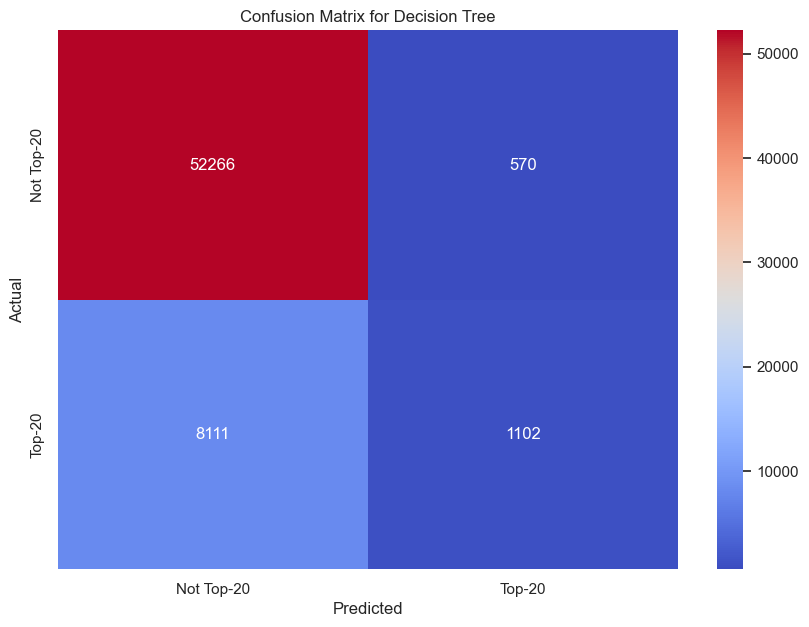

In [38]:
plot_confusion_matrix(validation_labels, validation_predictions_dt, title='Confusion Matrix for Decision Tree')

In [39]:
#saving the results
model_results.add_result(
    model_name='Decision Tree',
    train_set_predictions=training_predictions_dt,
    validation_set_predictions=validation_predictions_dt,
    parameters=grid_search_dt.best_params_,
    sample_size=SAMPLE_FRACTION
)

## Visualize the Decision Tree

In [40]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/Cellar/graphviz/12.2.1/bin'

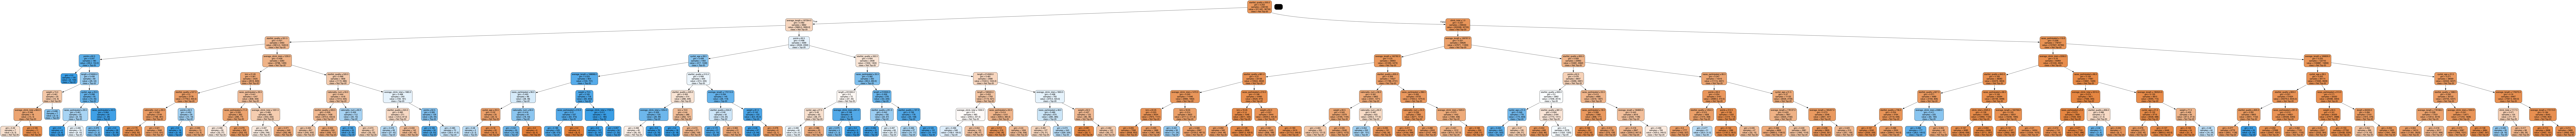

In [41]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(best_dt, out_file=None,
                                feature_names=list(train_set.columns),
                                class_names=['Not Top-20', 'Top-20'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Classification with Neural Networks (keras)

In [42]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [43]:
keras_model = tf.keras.Sequential([
    Input(shape=(train_set.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

keras_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

keras_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Fit the model to the training data
standard_scaler = sklearn.preprocessing.StandardScaler()

train_set_numpy = standard_scaler.fit_transform(train_set.to_numpy().astype(np.float32))
validation_set_numpy = standard_scaler.transform(validation_set.to_numpy().astype(np.float32))

train_labels_numpy = train_labels.to_numpy().astype(np.float32)
validation_labels_numpy = validation_labels.to_numpy().astype(np.float32)

train_set_numpy

array([[-0.1915496 ,  0.06557285,  0.33447438, ...,  0.90166616,
        -1.4527065 ,  0.9936846 ],
       [-0.76002634,  0.45846453, -1.0564231 , ...,  0.02763511,
         0.62465245, -1.4573504 ],
       [-0.1915496 ,  0.8122176 , -1.0564231 , ..., -2.7348979 ,
        -1.95436   ,  1.3204893 ],
       ...,
       [-0.1915496 ,  0.3305113 , -1.0564231 , ..., -0.91909426,
        -0.19496813, -0.04119683],
       [-0.76002634, -0.11506701, -1.0564231 , ...,  0.28868788,
        -1.5439249 , -0.53140384],
       [-0.1915496 ,  0.2913727 ,  0.7955525 , ...,  0.89010054,
        -0.02877557, -0.53140384]], dtype=float32)

In [45]:

keras_history = keras_model.fit(train_set_numpy, train_labels_numpy, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
6205/6205 ━━━━━━━━━━━━━━━━━━━━ 5s 696us/step - auc: 0.6372 - binary_accuracy: 0.8510 - loss: 0.4585 - precision: 0.4118 - recall: 0.0124 - val_auc: 0.6855 - val_binary_accuracy: 0.8538 - val_loss: 0.3958 - val_precision: 0.6647 - val_recall: 0.0152
Epoch 2/50
6205/6205 ━━━━━━━━━━━━━━━━━━━━ 4s 652us/step - auc: 0.6701 - binary_accuracy: 0.8529 - loss: 0.4002 - precision: 0.5328 - recall: 0.0189 - val_auc: 0.6917 - val_binary_accuracy: 0.8540 - val_loss: 0.3935 - val_precision: 0.6120 - val_recall: 0.0250
Epoch 3/50
6205/6205 ━━━━━━━━━━━━━━━━━━━━ 4s 661us/step - auc: 0.6799 - binary_accuracy: 0.8536 - loss: 0.3973 - precision: 0.5667 - recall: 0.0290 - val_auc: 0.6848 - val_binary_accuracy: 0.8533 - val_loss: 0.3944 - val_precision: 0.7385 - val_recall: 0.0066
Epoch 4/50
6205/6205 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step - auc: 0.6802 - binary_accuracy: 0.8537 - loss: 0.3973 - precision: 0.5799 - recall: 0.0266 - val_auc: 0.6926 - val_binary_accuracy: 0.8535 - val_loss: 0.3932 - val

## Evaluation

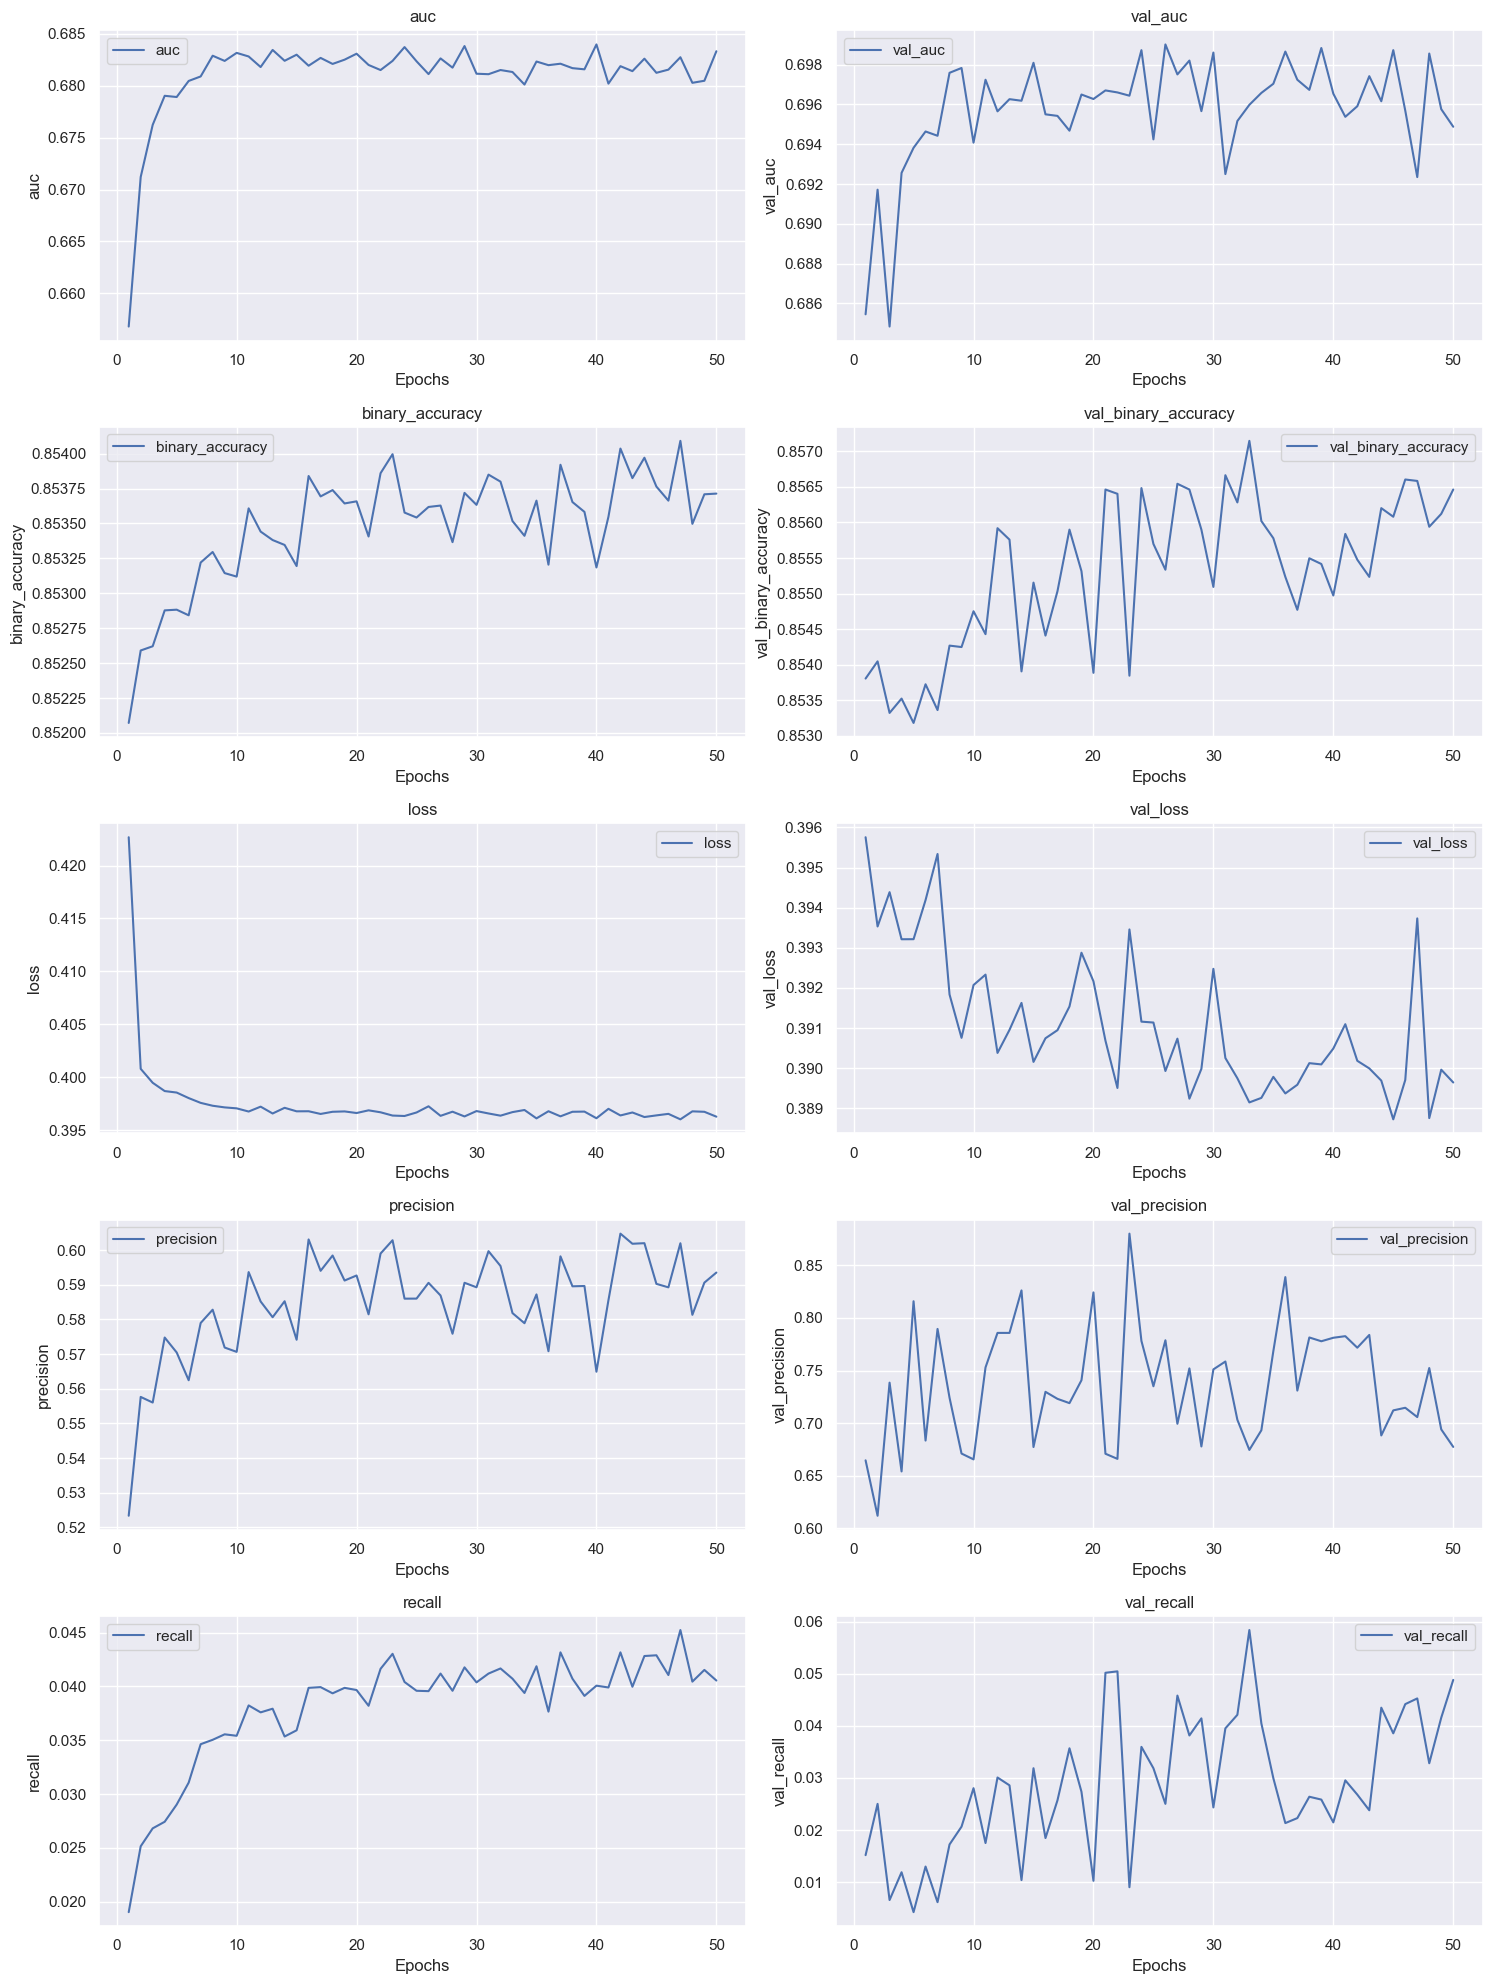

In [46]:
# Get all metrics from keras_history
keras_metrics = {metric: values for metric, values in keras_history.history.items()}

# Sort the metrics so that each training metric is followed by its corresponding validation metric
sorted_metrics = {}
for metric in sorted(keras_metrics.keys()):
    if not metric.startswith('val_'):
        sorted_metrics[metric] = keras_metrics[metric]
        val_metric = 'val_' + metric
        if val_metric in keras_metrics:
            sorted_metrics[val_metric] = keras_metrics[val_metric]

# Plotting all metrics
fig, axs = plt.subplots(len(sorted_metrics) // 2, 2, figsize=(15, 20))

for i, (metric, values) in enumerate(sorted_metrics.items()):
    ax = axs[i // 2, i % 2]
    ax.plot(range(1, len(values) + 1), values, label=metric)
    ax.set_title(metric)
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()


In [47]:
training_predictions_keras = keras_model.predict(train_set_numpy)
validation_predictions_keras = keras_model.predict(validation_set_numpy)

7757/7757 ━━━━━━━━━━━━━━━━━━━━ 2s 226us/step
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step


In [48]:
validation_predictions_keras

array([[0.05556997],
       [0.07694626],
       [0.12869231],
       ...,
       [0.09399155],
       [0.46219277],
       [0.20285001]], dtype=float32)

In [49]:
# Threshold the predictions to convert them to binary values
binary_training_predictions_keras = (training_predictions_keras > 0.5).astype(int)
binary_validation_predictions_keras = (validation_predictions_keras > 0.5).astype(int)

print(f"KERAS EVALUATION")

print(f"SAMPLE_FRACTION={SAMPLE_FRACTION}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, binary_training_predictions_keras)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, binary_validation_predictions_keras)

KERAS EVALUATION
SAMPLE_FRACTION=0.1


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92    211461
      Top-20       0.67      0.05      0.09     36734

    accuracy                           0.86    248195
   macro avg       0.76      0.52      0.51    248195
weighted avg       0.83      0.86      0.80    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92     52836
      Top-20       0.68      0.05      0.09      9213

    accuracy                           0.86     62049
   macro avg       0.77      0.52      0.51     62049
weighted avg       0.83      0.86      0.80     62049



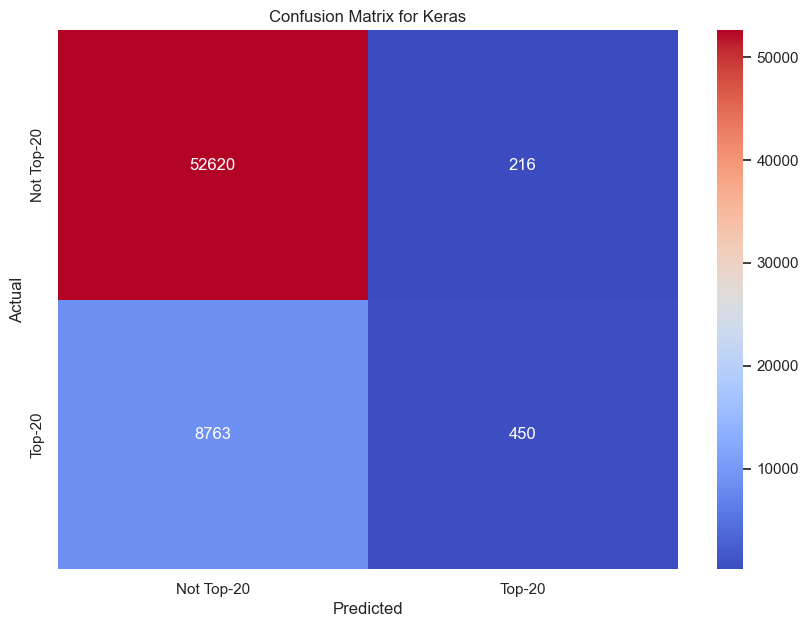

In [50]:
plot_confusion_matrix(validation_labels, binary_validation_predictions_keras, title='Confusion Matrix for Keras')

In [51]:
#saving the results
model_results.add_result(
    model_name='Keras',
    train_set_predictions=binary_training_predictions_keras,
    validation_set_predictions=binary_validation_predictions_keras,
    parameters=None,
    sample_size=SAMPLE_FRACTION
)

# Comparison and conclusions

In [52]:
# visualize the results

model_results.get_results()
ripper_reasons_df = pd.DataFrame(model_results.get_results())
ripper_reasons_df

model_name                              train_set_predictions  \
0            KNN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1            GNB  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
2         RIPPER  [False, False, False, False, False, False, Fal...   
3  Decision Tree  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4          Keras  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...   

                          validation_set_predictions  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
2  [False, False, False, False, False, False, Fal...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...   

                                          parameters  sample_size  
0  {'weights': 'uniform', 'n_neighbors': 10, 'met...          0.1  
1                                               None          0.1  
2                        {'prune_size': 0.5, 'k': 5}          0.1  
3  {'criterion': 'gini', 'max_depth': 7, 'min_sam...          0.1  
4                                               None          0.1

In [53]:
model_results.get_results()[0]

{'model_name': 'KNN',
 'train_set_predictions': array([0, 0, 0, ..., 0, 0, 0]),
 'validation_set_predictions': array([0, 0, 0, ..., 0, 0, 0]),
 'parameters': {'weights': 'uniform',
  'n_neighbors': 10,
  'metric': 'manhattan'},
 'sample_size': 0.1}

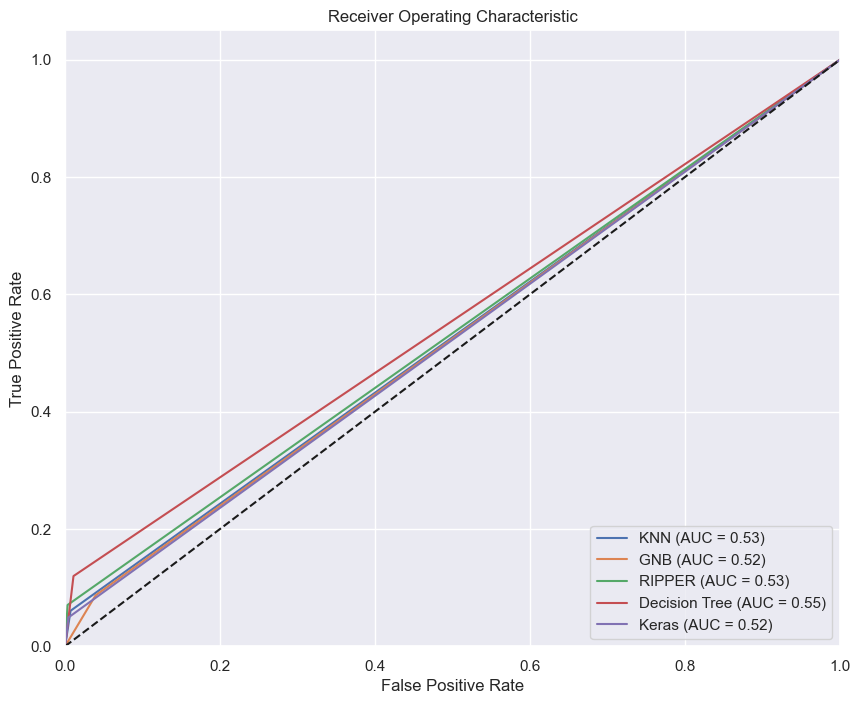

In [60]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for result in model_results.get_results():
    model_name = result['model_name']
    validation_predictions = result['validation_set_predictions']
    
    # Compute ROC curve and AUC for validation set
    fpr_val, tpr_val, _ = roc_curve(validation_labels, validation_predictions)
    roc_auc_val = auc(fpr_val, tpr_val)
    
    # Plot ROC curve for validation set
    plt.plot(fpr_val, tpr_val, label=f'{model_name} (AUC = {roc_auc_val:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
